In [1]:
# import packages

import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows=200
import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc


from sklearn.metrics import precision_recall_curve,roc_auc_score,classification_report,roc_curve
from tqdm import tqdm

In [2]:
train = pd.read_csv('./train_merged.csv')
test = pd.read_csv('./test_merged.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 26 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
city                  int64
age                   float64
gender                object
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             object
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
name                  object
country               object
publisher             object
year_released         float64
dtypes: float64(4), int64(8), object(14)
memory usage: 1.4+ GB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 26 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
city                  int64
age                   float64
gender                object
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             object
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
name                  object
country               object
publisher             object
year_released         float64
dtypes: float64(4), int64(8), object(14)
memory usage: 507.2+ MB


In [5]:
# missing data

In [6]:
train.isnull().sum()

msno                        0
song_id                     0
source_system_tab       24849
source_screen_name     414804
source_type             21539
target                      0
city                        0
age                   2940499
gender                2961479
registered_via              0
registration_year           0
registration_month          0
expiration_year             0
expiration_month            0
days                        0
age_range             2947202
song_length               114
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                  150
name                     1571
country                577963
publisher              577963
year_released          577963
dtype: int64

In [7]:
train.isnull().sum()/train.isnull().count()*100

msno                   0.000000
song_id                0.000000
source_system_tab      0.336825
source_screen_name     5.622618
source_type            0.291959
target                 0.000000
city                   0.000000
age                   39.858105
gender                40.142486
registered_via         0.000000
registration_year      0.000000
registration_month     0.000000
expiration_year        0.000000
expiration_month       0.000000
days                   0.000000
age_range             39.948963
song_length            0.001545
genre_ids              1.605643
artist_name            0.001545
composer              22.713990
lyricist              43.088219
language               0.002033
name                   0.021295
country                7.834218
publisher              7.834218
year_released          7.834218
dtype: float64

In [8]:
test.isnull().sum()

id                          0
msno                        0
song_id                     0
source_system_tab        8442
source_screen_name     162883
source_type              7297
city                        0
age                   1043221
gender                1052224
registered_via              0
registration_year           0
registration_month          0
expiration_year             0
expiration_month            0
days                        0
age_range             1046316
song_length                25
genre_ids               42110
artist_name                25
composer               619304
lyricist              1224744
language                   42
name                      803
country                196665
publisher              196665
year_released          196665
dtype: int64

In [9]:
# for language (150 missing value)
print(train['language'].value_counts())

 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64


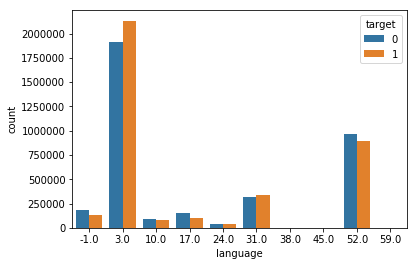

In [10]:
#plt.figure(figsize=(10,10))
sns.countplot(train['language'],hue=train['target'])

In [11]:
# check the 150 missing value of language

language_null=train[train.language.isnull().values==True]
language_null

print("From the above table, we can see that most of songs have many other missing values like composer, name, and other infomation related to the song except one song named 'White T shirt'. in addition, we can see that most songs are from local library, local playlist, and album. this may cause their lack of infomation ")

From the above table, we can see that most of songs have many other missing values like composer, name, and other infomation related to the song except one song named 'White T shirt'. in addition, we can see that most songs are from local library, local playlist, and album. this may cause their lack of infomation 


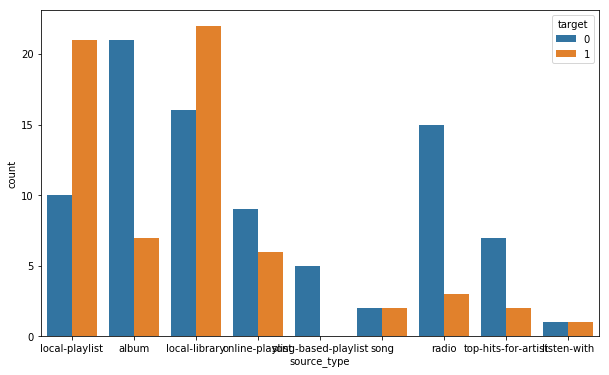

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(language_null['source_type'],hue=language_null['target'])


In [13]:
train.language=train.language.fillna(0).astype(np.int16)
test.language=test.language.fillna(0).astype(np.int16)

In [14]:
#### for song_length
print(train.song_length.mean())
print(test.song_length.mean())
print(train.song_length.mode())
print(test.song_length.mode())

245120.9693600806
243843.54204551454
0    235415.0
dtype: float64
0    234161.0
dtype: float64


In [15]:
train.song_length.fillna(237000,inplace=True)
train.song_length = train.song_length.astype(np.int64)

test.song_length.fillna(236000,inplace=True)
test.song_length = test.song_length.astype(np.int64)



In [16]:
print(len(train.query("age< 5 or age >90")) / len(train))
print(len(test.query("age< 5 or age >90")) / len(test))
#train = train.query("age>= 5 and age <=90")
#test = test.query("age>= 5 and age <=90")

0.001049960839957828
0.001300849893812163


In [17]:
train[train.age>90] = 90

train[train.age<0]=0
train[train.age<5]=0

In [18]:
test[test.age>90] = 90

test[test.age<0]=0
test[test.age<5]=0

In [19]:
train.age.mode()

0    25.0
dtype: float64

In [20]:
train.age.mean()

28.809896912700008

In [21]:
test.age.mode()

0    26.0
dtype: float64

In [22]:
test.age.mean()

28.985749576002153

In [23]:
train.age=train.age.fillna(25)
test.age=test.age.fillna(26)

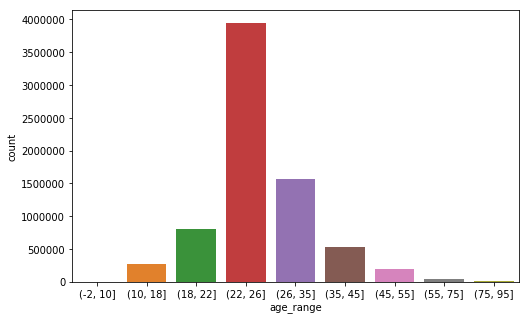

In [24]:
#### age_range
train['age_range'] = pd.cut(train['age'],bins=[-2,10,18,22,26,35,45,55,75,95])

plt.figure(figsize=(8,5))
sns.countplot(train['age_range'])

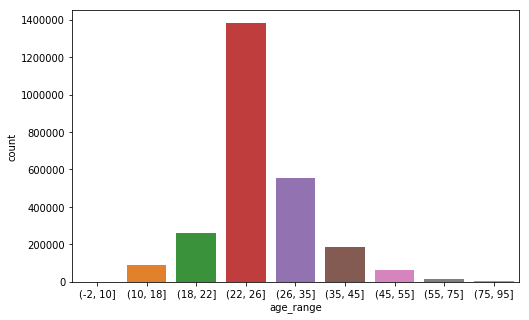

In [25]:
#### age_range
test['age_range'] = pd.cut(test['age'],bins=[-2,10,18,22,26,35,45,55,75,95])

plt.figure(figsize=(8,5))
sns.countplot(test['age_range'])

In [26]:
### gender
print(train.gender.isnull().sum())

## since gender is personal infomation, and cannot gain from other given infomation, fill with 'unknwon' might work.

train.gender=train.gender.fillna('unknwon')
test.gender=test.gender.fillna('unknwon')

2961284


In [27]:
####### source_screen_name¶
print(train.source_screen_name.nunique())
print(test.source_screen_name.nunique())

print(train.source_screen_name.unique())
print(test.source_screen_name.unique())



22
24
['Explore' 'Local playlist more' nan 'My library' 'Online playlist more'
 'Album more' 'Discover Feature' 'Unknown' 'Discover Chart' 'Radio'
 'Artist more' 'Search' 'Others profile more' 'Search Trends'
 'Discover Genre' 'My library_Search' 'Search Home' 'Discover New' 0 90
 'Self profile more' 'Concert' 'Payment']
['Local playlist more' nan 'Radio' 'Online playlist more' 'Artist more'
 'Discover Genre' 'Album more' 'Discover Chart' 'Discover Feature'
 'Search' 'Unknown' 'Explore' 'Others profile more' 'My library'
 'My library_Search' 'Search Trends' 'Discover New' 'Search Home' 90 0
 'Payment' 'Self profile more' 'People local' 'Concert' 'People global']


In [28]:

print("there are 2 more categories in test set: people local and people global. therefore, the missing value can be replaced by other_sources. and the two extra categories in test set can be replaced as well.")


there are 2 more categories in test set: people local and people global. therefore, the missing value can be replaced by other_sources. and the two extra categories in test set can be replaced as well.


In [29]:
train.source_screen_name = train.source_screen_name.fillna('other_sources')
test.source_screen_name = test.source_screen_name.fillna('other_sources')

test['source_screen_name'] = test['source_screen_name'].replace(['People local', 'People global'], 'other_sources')

In [30]:
#### source_type

print(train.source_type.nunique())
print(test.source_type.nunique())

print(train.source_type.unique())
print(test.source_type.unique())


14
14
['online-playlist' 'local-playlist' 'local-library' 'top-hits-for-artist'
 'album' nan 'song-based-playlist' 'radio' 'song' 'listen-with' 'artist' 0
 90 'topic-article-playlist' 'my-daily-playlist']
['local-library' 'song-based-playlist' 'radio' 'local-playlist'
 'online-playlist' 'top-hits-for-artist' 'album' 'song' 'listen-with'
 'my-daily-playlist' 'topic-article-playlist' nan 'artist' 90 0]


In [31]:

print("there is no difference between train set and test set, besides, both of them has 'nan' value,  so it can replaced by 'other_tpyes'.")
train.source_type = train.source_type.fillna('other_sources')
test.source_type = test.source_type.fillna('other_sources')


there is no difference between train set and test set, besides, both of them has 'nan' value,  so it can replaced by 'other_tpyes'.


In [32]:
##### source_system
print(train.source_system_tab.nunique())
print(test.source_system_tab.nunique())

print(train.source_system_tab.unique())
print(test.source_system_tab.unique())

print("similarly, there is no difference between train set and test set,so i replace them by 'other_system'.")

train.source_system_tab = train.source_system_tab.fillna('other_system')
test.source_system_tab = test.source_system_tab.fillna('other_system')


10
10
['explore' 'my library' 'search' 'discover' nan 'radio' 'listen with'
 'notification' 0 90 'settings']
['my library' 'discover' 'radio' 'search' 'listen with' 'explore'
 'settings' nan 'notification' 90 0]
similarly, there is no difference between train set and test set,so i replace them by 'other_system'.


In [33]:
### genre_ids
print(train.genre_ids.nunique())
print(test.genre_ids.nunique())

574
503


In [34]:
train.genre_ids=train.genre_ids.fillna('0')
test.genre_ids=test.genre_ids.fillna('0')

In [35]:
train.genre_ids.unique().tolist()


['359',
 '1259',
 '1019',
 '1011',
 '465',
 '2022',
 '458',
 '465|458',
 '0',
 '1609',
 '423',
 '921',
 '451',
 '437',
 '465|1259',
 '444',
 '921|458',
 '958',
 '829',
 '921|465',
 '691',
 '940|388',
 '880|458',
 '1616|1609',
 '1616',
 '139|125|109',
 '465|430',
 '1152|829',
 '139',
 '947',
 '2157',
 '940',
 '726',
 '786|726',
 '2122',
 '458|1287',
 '786|947',
 '465|1011',
 '864|850|726|857|843',
 '786',
 '786|2122',
 '242|726',
 '726|242',
 '352|1995',
 '444|1259',
 '698',
 '465|921',
 '893',
 '465|139',
 '2122|947|958',
 '958|786',
 '388',
 '2176|2093',
 '1152',
 '430',
 '465|2122',
 '1155',
 '1616|2058',
 '242',
 '2116|1616',
 '1180',
 '864|857|850|843',
 '465|2022',
 '1609|465',
 '873',
 '864|786|850|857|843',
 '1609|458',
 '864|850|857|921|843',
 '900',
 '2189|367',
 '798',
 '1572|275',
 '1609|282',
 '444|1609',
 '829|786',
 '2086',
 '545',
 0,
 '437|850',
 90,
 '465|798',
 '465|958',
 '864|843',
 '2079',
 '1605',
 '465|691',
 '880',
 '1955',
 '1609|2107',
 '184|2122',
 '409',
 '2

In [36]:
# from above data, we can see that there are some songs with mutilple genres.
def genres_count(x):
    if type(x) != str:
        return 1
    else:
        return 1 + x.count('|')

In [37]:
train["num_genre"]=train.genre_ids.apply(genres_count)
test["num_genre"]=test.genre_ids.apply(genres_count)
print(train['num_genre'].max())
print(test['num_genre'].max())
# there are most 8 genres for one song in train set

8
8


In [38]:
# artist_name

print(train.artist_name.nunique())
print(test.artist_name.nunique())

train.artist_name=train.artist_name.fillna('unknwon')
test.artist_name=test.artist_name.fillna('unknwon')

def artist_count(x):
    if type(x) != str:
        return 1
    else:
        return x.count('and') + x.count('|') + x.count( '/') + x.count('\\') + x.count(';') + x.count(',') + x.count('feat') + x.count('&') + 1

train['num_artist'] = train.artist_name.apply(artist_count)
test['num_artist'] = test.artist_name.apply(artist_count)



40575
27558


In [39]:
train.num_artist.describe()

count    7.377418e+06
mean     1.044201e+00
std      2.593254e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.500000e+01
Name: num_artist, dtype: float64

In [40]:
# composer
print(train.composer.nunique())
print(test.composer.nunique())
train.composer=train.composer.fillna('unknwon')
test.composer=test.composer.fillna('unknwon')

76055
52302


In [41]:

def composer_count(x):
    if type(x) != str:
        return 1
    else:
        return x.count('and') + x.count('|') + x.count( '/') + x.count('\\') + x.count(';') + x.count(',') + x.count('feat') + x.count('&') + 1

train['num_composer'] = train.composer.apply(composer_count).astype(np.int32)
test['num_composer'] = test.composer.apply(composer_count).astype(np.int32)


In [42]:
train.num_composer.describe()

count    7.377418e+06
mean     1.634492e+00
std      1.536360e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.470000e+02
Name: num_composer, dtype: float64

In [43]:
test.num_composer.describe()

count    2.556790e+06
mean     1.654612e+00
std      1.540358e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.470000e+02
Name: num_composer, dtype: float64

In [44]:
# lyricist 
print(train.lyricist.nunique())
print(test.lyricist.nunique())

33888
24908


In [45]:
train.lyricist=train.lyricist.fillna('unknwon')
test.lyricist=test.lyricist.fillna('unknwon')
def lyricist_count(x):
    if type(x) != str:
        return 1
    else:
        return x.count('and') + x.count('|') + x.count( '/') + x.count('\\') + x.count(';') + x.count(',') + x.count('feat') + x.count('&') + 1

train['num_composer'] = train.composer.apply(lyricist_count).astype(np.int32)
test['num_composer'] = test.composer.apply(lyricist_count).astype(np.int32)


In [46]:
# song name
train.name=train.name.fillna('unknwon')
test.name=test.name.fillna('unknwon')

In [47]:
# song irsc expand
train.country=train.country.fillna('unknwon')
test.country=test.country.fillna('unknwon')

train.publisher=train.publisher.fillna('unknwon')
test.publisher=test.publisher.fillna('unknwon')

train.year_released=train.year_released.fillna('unknwon')
test.year_released=test.year_released.fillna('unknwon')



In [48]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
city                  0
age                   0
gender                0
registered_via        0
registration_year     0
registration_month    0
expiration_year       0
expiration_month      0
days                  0
age_range             0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
name                  0
country               0
publisher             0
year_released         0
num_genre             0
num_artist            0
num_composer          0
dtype: int64

In [49]:
test.isnull().sum()

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
city                  0
age                   0
gender                0
registered_via        0
registration_year     0
registration_month    0
expiration_year       0
expiration_month      0
days                  0
age_range             0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
name                  0
country               0
publisher             0
year_released         0
num_genre             0
num_artist            0
num_composer          0
dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 29 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
city                  int64
age                   float64
gender                object
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             category
song_length           int64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              int16
name                  object
country               object
publisher             object
year_released         object
num_genre             int64
num_artist            int64
num_composer          int32
dtypes: category(1), float64(1), int16(1), int32(1), int

In [51]:
## trans object types to category

train = pd.concat([
        train.select_dtypes([], ['object']),
        train.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex(train.columns, axis=1)

test = pd.concat([
        test.select_dtypes([], ['object']),
        test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex(test.columns, axis=1)

In [52]:
# encoding 
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

    
    
for col in test.select_dtypes(include=['category']).columns:
    test[col] = test[col].cat.codes

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 29 columns):
msno                  int16
song_id               int32
source_system_tab     int8
source_screen_name    int8
source_type           int8
target                int64
city                  int64
age                   int32
gender                int8
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             int8
song_length           int64
genre_ids             int16
artist_name           int32
composer              int32
lyricist              int32
language              int16
name                  int32
country               int8
publisher             int16
year_released         int8
num_genre             int64
num_artist            int64
num_composer          int32
dtypes: int16(4), int32(7), int64(11), int8(7)
memory usage: 921.7 MB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 29 columns):
id                    int64
msno                  int16
song_id               int32
source_system_tab     int8
source_screen_name    int8
source_type           int8
city                  int64
age                   int32
gender                int8
registered_via        int64
registration_year     int64
registration_month    int64
expiration_year       int64
expiration_month      int64
days                  int64
age_range             int8
song_length           int64
genre_ids             int16
artist_name           int16
composer              int32
lyricist              int16
language              int16
name                  int32
country               int8
publisher             int16
year_released         int8
num_genre             int64
num_artist            int64
num_composer          int32
dtypes: int16(6), int32(5), int64(11), int8(7)
memory usage: 309.7 MB


In [57]:
train.age=train.age.astype('int32')

In [58]:
test.age=test.age.astype('int32')

In [61]:
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)